<a href="https://colab.research.google.com/github/Vishwarajsinh/python/blob/master/MACD_CROSSOVER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**MACD CROSSOVER STRATEGY**


*   MACD crossover strategy is short for moving average convergence divergence crossover
*   It is a technical indecator that uses the difference between exponential moving averages to determine the momentum and direction of the market.
*   When MACD line crosses above the signal line that indicates a good time to buy and when it is elow the signal line that indicates a good time to sell.
*   MACD line is calculated by taking the short term exponential moving averate and subtracting the long term exponential moving average.
*   Usually short term lasts 12 periods, the long term lasts 26 periods and the signal line is usually a 9 period exponentially smooth average of the MACD line.



In [1]:
 #Import the dependencies 

 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from pandas_datareader import data as web
 plt.style.use('fivethirtyeight')

In [2]:
startDate = '2020-01-01'

In [3]:
df = web.DataReader('WIPRO.NS', data_source='yahoo', start = startDate)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,248.649994,246.199997,246.500000,247.699997,1413866.0,246.704010
2020-01-02,249.899994,246.350006,246.600006,248.300003,1443966.0,247.301605
2020-01-03,252.699997,247.350006,249.500000,251.100006,3381404.0,250.090347
2020-01-06,254.449997,250.149994,251.000000,252.149994,4566695.0,251.136124
2020-01-07,256.350006,250.199997,253.250000,255.199997,4402787.0,254.173859


In [4]:
df.shape

(189, 6)

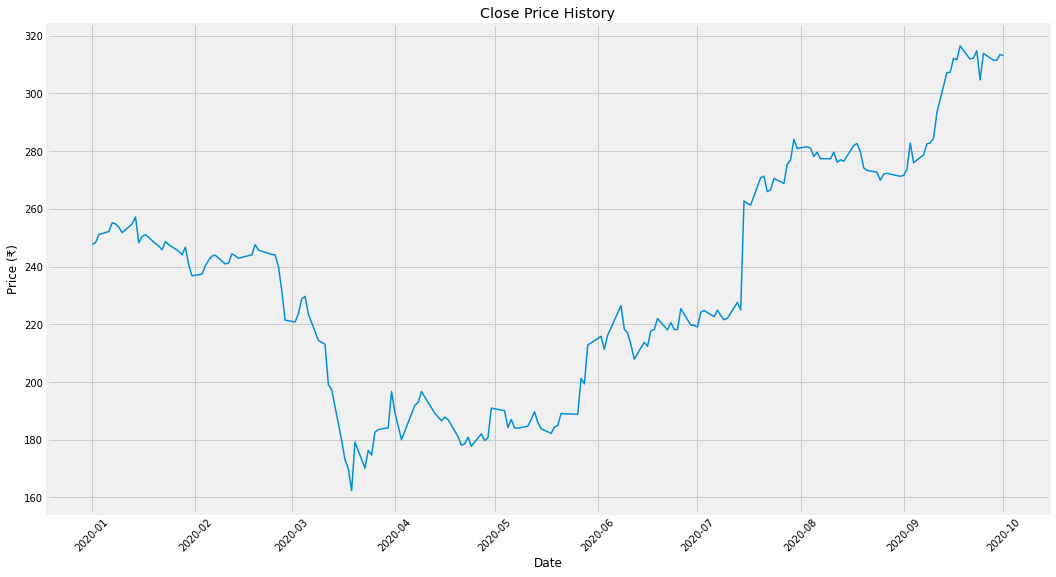

In [5]:
plt.figure(figsize = (16, 9))
plt.rcParams['lines.linewidth'] = 1.5
plt.plot(df['Close'], label = 'Close')
plt.xticks(rotation = 45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.show()

In [6]:
# Calculate MACD and Signal line indecators

#Short Term MA
ShortEMA = df.Close.ewm(span = 12, adjust = False).mean()

#Long Term MA
LongEMA = df.Close.ewm(span = 26, adjust = False).mean()

# Calculate MACD line
MACD = ShortEMA - LongEMA

# Calculate the signal line
signal = MACD.ewm(span = 9, adjust = False).mean()

<function matplotlib.pyplot.show>

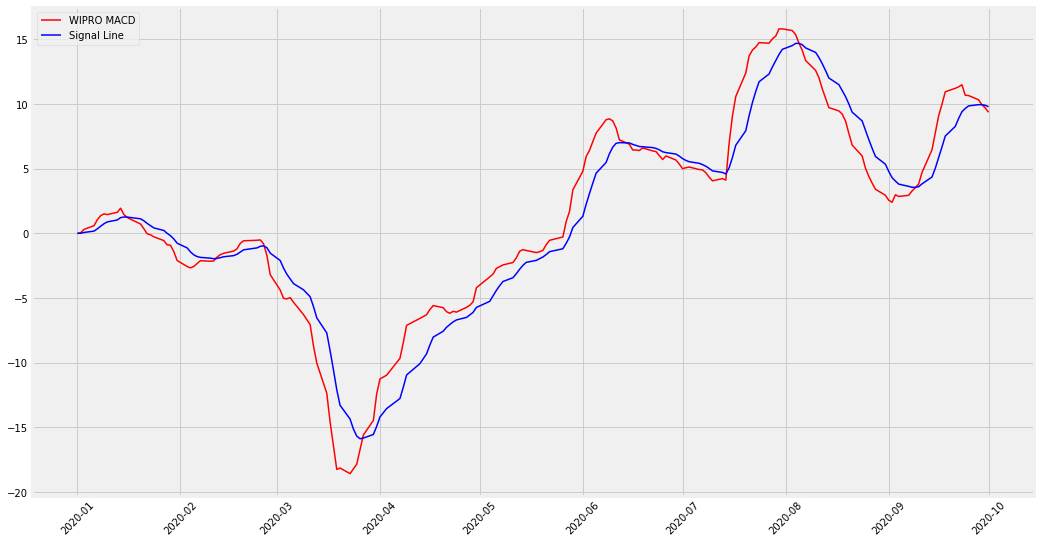

In [7]:
# Plot the chart
plt.figure(figsize = (16, 9))
plt.rcParams['lines.linewidth'] = 1.5
plt.xticks(rotation = 45)
plt.plot(df.index, MACD, label = 'WIPRO MACD', color = 'red')
plt.plot(df.index, signal, label = 'Signal Line', color = 'blue')
plt.legend(loc = 'upper left')
plt.show

In [8]:
# Generate Columns for MACD
df['MACD'] = MACD
df['signal'] = signal
df.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,signal
Date,,,,,,,,
2020-01-01,248.649994,246.199997,246.500000,247.699997,1413866.0,246.704010,0.000000,0.000000
2020-01-02,249.899994,246.350006,246.600006,248.300003,1443966.0,247.301605,0.047864,0.009573
2020-01-03,252.699997,247.350006,249.500000,251.100006,3381404.0,250.090347,0.308180,0.069294
2020-01-06,254.449997,250.149994,251.000000,252.149994,4566695.0,251.136124,0.592380,0.173911
2020-01-07,256.350006,250.199997,253.250000,255.199997,4402787.0,254.173859,1.051598,0.349449


In [9]:
# Create function to signal when to buy and sell
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['signal'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
      
    elif signal['MACD'][i] < signal['signal'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)

    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)
    

In [10]:
# Create buy & sell signal column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

# Show data
df.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-01,248.649994,246.199997,246.500000,247.699997,1413866.0,246.704010,0.000000,0.000000,NaN,NaN
2020-01-02,249.899994,246.350006,246.600006,248.300003,1443966.0,247.301605,0.047864,0.009573,248.300003,NaN
2020-01-03,252.699997,247.350006,249.500000,251.100006,3381404.0,250.090347,0.308180,0.069294,NaN,NaN
2020-01-06,254.449997,250.149994,251.000000,252.149994,4566695.0,251.136124,0.592380,0.173911,NaN,NaN
2020-01-07,256.350006,250.199997,253.250000,255.199997,4402787.0,254.173859,1.051598,0.349449,NaN,NaN


<function matplotlib.pyplot.show>

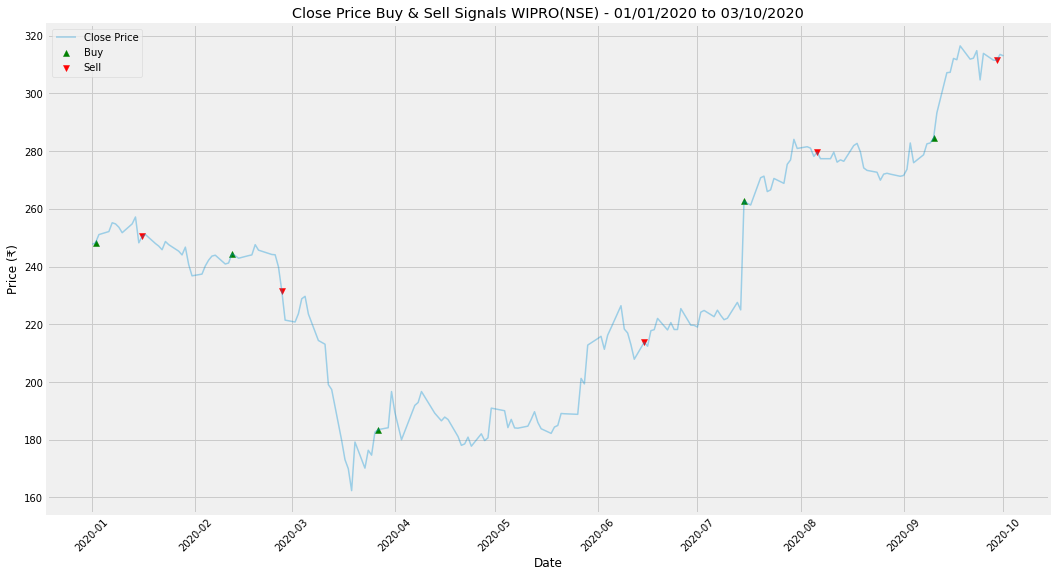

In [16]:
# Visually show Buy & Sell signals
plt.figure(figsize = (16, 9))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label ="Buy", marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label ="Sell", marker = 'v', alpha = 1)

plt.rcParams['lines.linewidth'] = 1.5
plt.xticks(rotation = 45)
plt.plot(df['Close'], label = 'Close Price', alpha = 0.35)

plt.title('Close Price Buy & Sell Signals WIPRO(NSE) - 01/01/2020 to 03/10/2020')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend(loc = 'upper left')
plt.show